In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [45]:
Dataset_path="Downloads/exam"
IMG_SIZE=(224,224)
BATCH_SIZE=32
SEED=42

In [46]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    validation_split=0.3,
    subset="training",
    seed=SEED,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

full_val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    validation_split=0.3,
    subset="validation",
    seed=SEED,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

train_size=len(train_ds)
val_size=len(full_val_ds)//2
test_size=len(full_val_ds)-val_size

val_ds=full_val_ds.take(val_size)
test_ds=full_val_ds.skip(val_size)

print(train_size)
print(val_size)

Found 1000 files belonging to 2 classes.
Using 700 files for training.
Found 1000 files belonging to 2 classes.
Using 300 files for validation.
22
5


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [48]:
model=Sequential([
    Conv2D(32,(3,3), input_shape=(224,224,3), activation='relu',),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
model.summary()
    

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 26, 26, 128)     

In [49]:
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3)

Epoch 1/3
22/22 [==============================] - 64s 3s/step - loss: 13.3072 - accuracy: 0.5071 - val_loss: 1.0268 - val_accuracy: 0.4750
Epoch 2/3
22/22 [==============================] - 61s 3s/step - loss: 0.7249 - accuracy: 0.5071 - val_loss: 0.6989 - val_accuracy: 0.4938
Epoch 3/3
22/22 [==============================] - 62s 3s/step - loss: 0.6748 - accuracy: 0.5800 - val_loss: 0.6838 - val_accuracy: 0.5437


In [57]:
for image, label in train_ds.take(1):
    single_image=image[0].numpy()

In [58]:
def preprocess(image):
    image=tf.image.resize(image,(224,224))
    image=tf.cast(image,tf.float32)/255.0
    return image
preprocess(single_image)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.42117816, 0.40423137, 0.43168235],
        [0.43403518, 0.42727903, 0.45222574],
        [0.42769608, 0.43707985, 0.4566877 ],
        ...,
        [0.5474216 , 0.57487255, 0.6454608 ],
        [0.540415  , 0.56786597, 0.6384542 ],
        [0.5331051 , 0.56055605, 0.6311443 ]],

       [[0.43170676, 0.42218137, 0.44851267],
        [0.4223874 , 0.42520604, 0.44542426],
        [0.39802265, 0.41400656, 0.4313161 ],
        ...,
        [0.54449856, 0.57194954, 0.6425378 ],
        [0.54607207, 0.57352304, 0.6441113 ],
        [0.5402662 , 0.5677172 , 0.6383054 ]],

       [[0.42407212, 0.42335436, 0.44537392],
        [0.4166268 , 0.42907912, 0.44834557],
        [0.40027496, 0.42870116, 0.441385  ],
        ...,
        [0.52844185, 0.5558928 , 0.62648106],
        [0.5423145 , 0.5697655 , 0.64035374],
        [0.5412328 , 0.5686838 , 0.63927203]],

       ...,

       [[0.5933207 , 0.6482227 , 0.69135994],
        [0.57

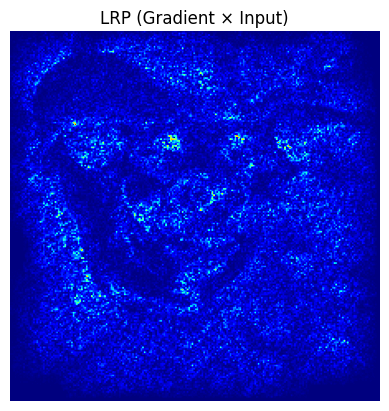

In [61]:
img_batch = np.expand_dims(single_image, axis=0)
img_tensor = tf.convert_to_tensor(img_batch)
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    preds=model(img_tensor)
    class_idx=tf.argmax(preds[0])
    loss=preds[0,class_idx]

grads=tape.gradient(loss, img_tensor)[0].numpy()
relevance = grads * single_image  # same shape
relevance_gray = np.abs(np.mean(relevance, axis=-1))


# Plot result
plt.imshow(relevance_gray,cmap='jet')
plt.title("LRP (Gradient × Input)")
plt.axis('off')
plt.show()
